Installerar nödvändiga paket...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 2.8 MB/s eta 0:00:00
Paket installerade!



/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


Bibliotek importerade!

Ladda in en CSV-fil...
Välj din CSV-fil:


Saving articles_clean.csv to articles_clean.csv
Laddade 76 artiklar!

DATAÖVERSIKT:
Antal artiklar: 76
Genomsnittlig längd: 2405 tecken
Kortaste artikel: 461 tecken
Längsta artikel: 5000 tecken

Kolumner: url, title, content, success, text_length, title_length

Förbehandlar text...
Extraherade 17191 ord totalt

Analyserar ordfrekvens...


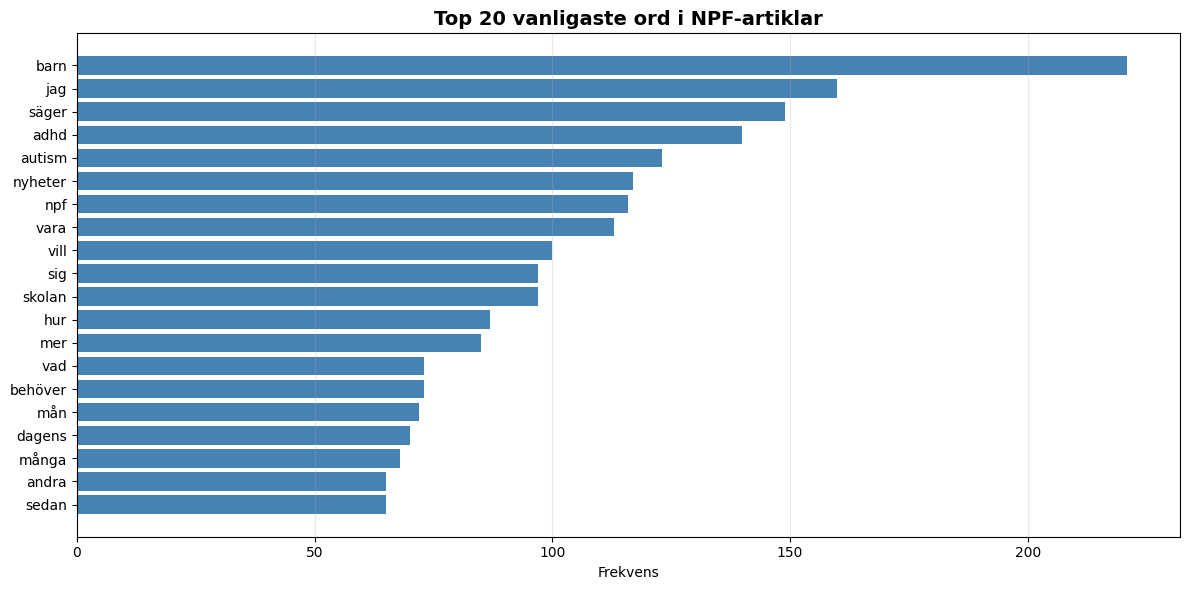

Top 5 ord: barn, jag, säger, adhd, autism

Skapar wordcloud...


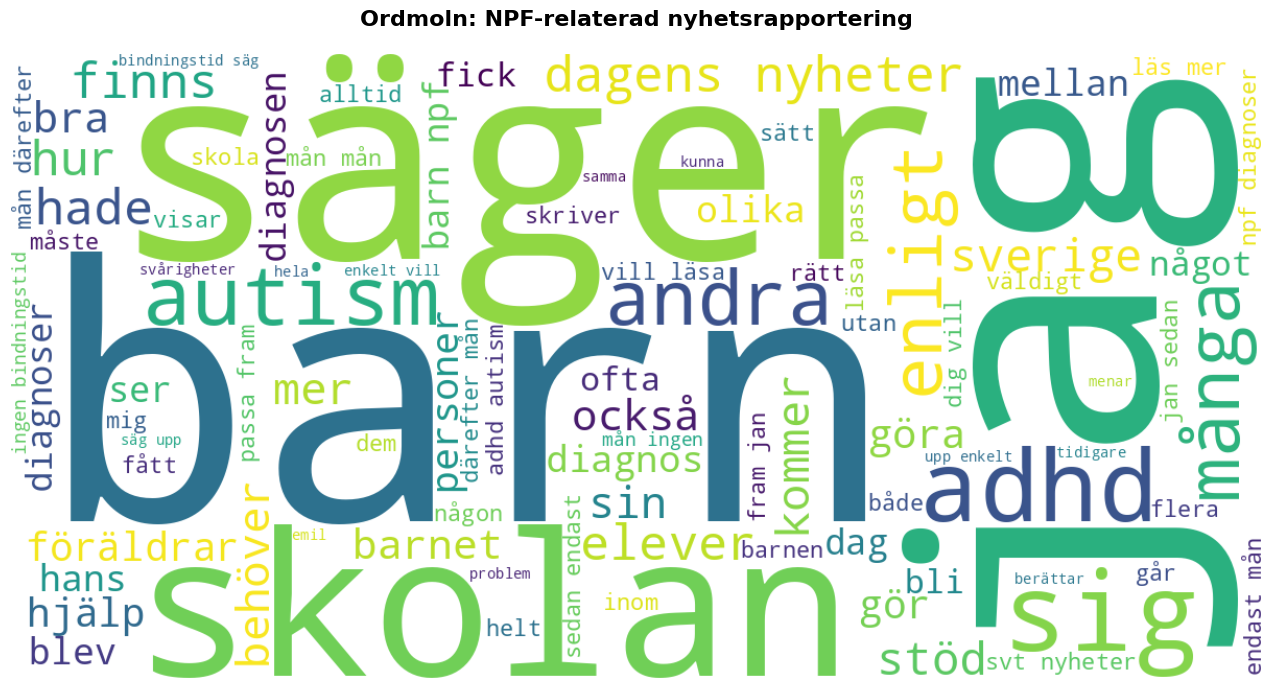

Wordcloud skapad!

Kör BERTopic för temaidentifiering...
(Detta kan ta 3-5 minuter första gången...)



modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Identifierade 6 teman (+ 1 outlier-kategori)

IDENTIFIERADE TEMAN:

Tema 0: 21 artiklar
  Nyckelord: autism, vi, barn, säger, vara

Tema 1: 12 artiklar
  Nyckelord: du, mån, kr, barn, kr mån

Tema 2: 11 artiklar
  Nyckelord: jag, barn, skolan, säger, npf

Tema 3: 7 artiklar
  Nyckelord: npf, elever, eleverna, procent, barn

Tema 4: 5 artiklar
  Nyckelord: jag, adhd, fick, du, mån

Tema 5: 4 artiklar
  Nyckelord: adhd, utredningar, utredning, företag, diagnos

✓ Tema-visualisering sparad som 'topics_barchart.html'



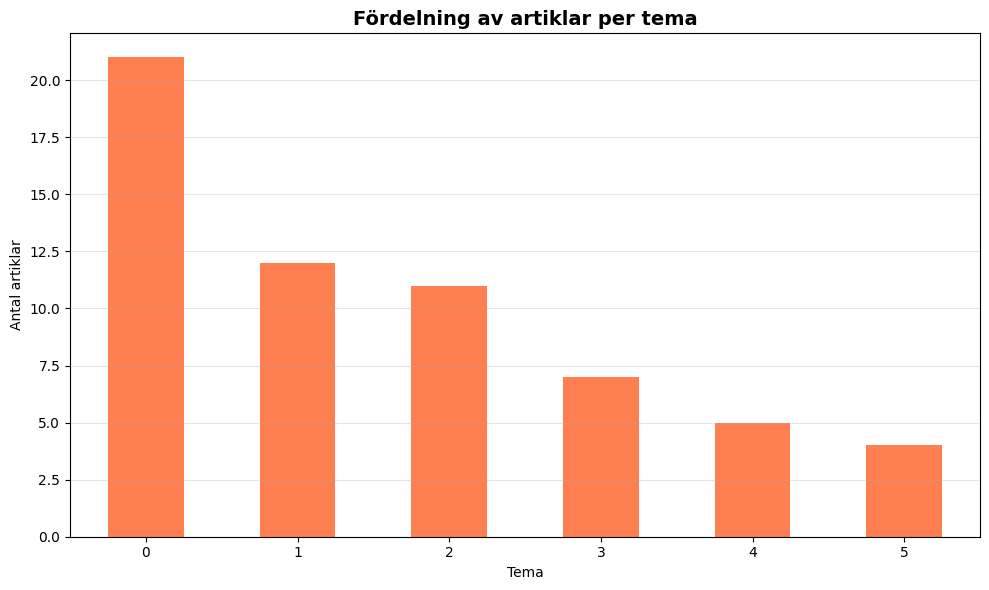

Kör sentimentanalys...


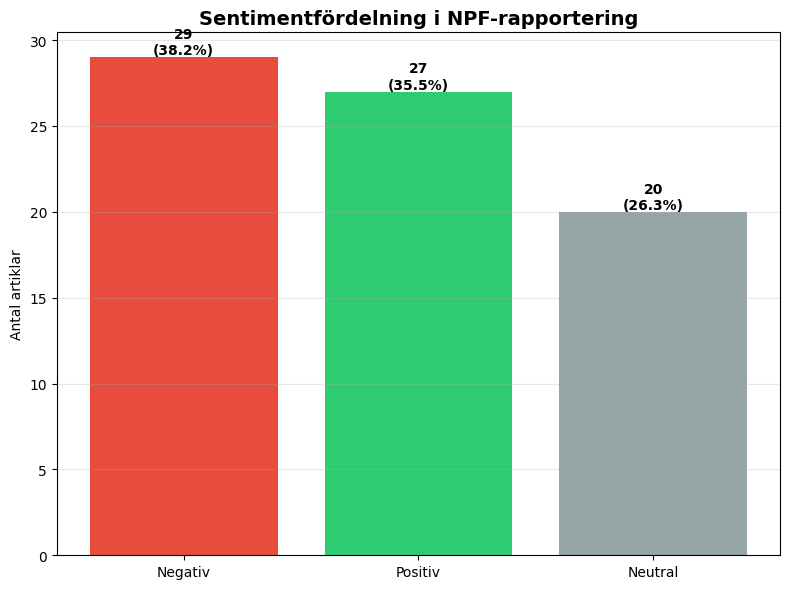


 Sentiment analyserat!
  Positiv: 27 (35.5%)
  Neutral: 20 (26.3%)
  Negativ: 29 (38.2%)

Skapar kombinerad tema-sentiment analys...


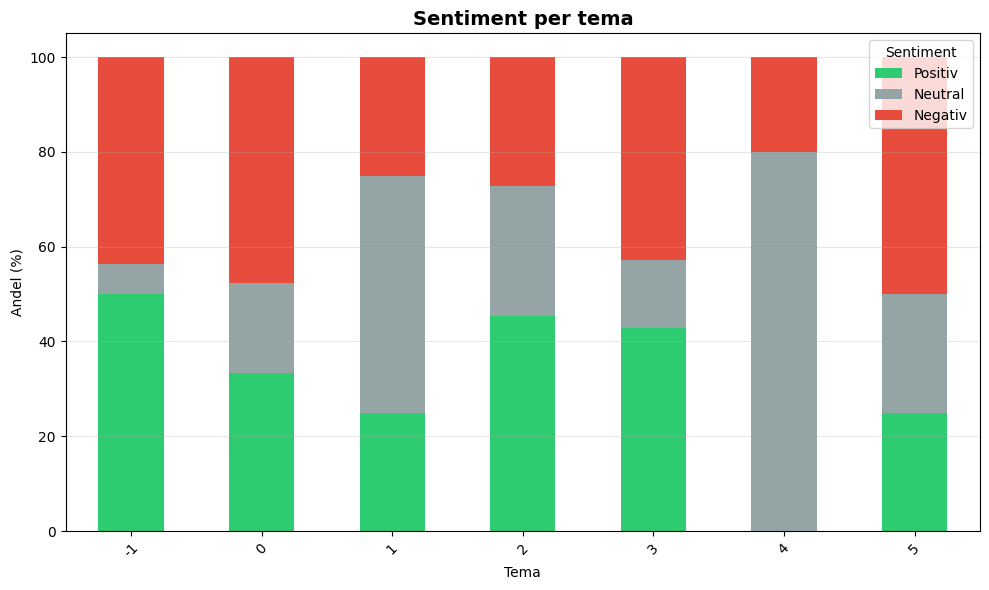

Kombinerad analys klar!

Exporterar resultat...
✓ Sparade 'artiklar_analyserade.csv'
✓ Sparade 'teman_oversikt.csv'
Sparade 'sammanfattning.csv'

Laddar ner alla resultatfiler...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


ANALYS KLAR!

RESULTAT:
- Analyserade 76 artiklar om NPF
- Identifierade 6 huvudteman
- Sentiment: 27 positiva, 20 neutrala, 29 negativa

NEDLADDADE FILER:
1. ordfrekvens.png - Vanligaste ord
2. wordcloud.png - Ordmoln
3. tema_fordelning.png - Temafördelning
4. sentiment.png - Sentimentanalys
5. tema_sentiment.png - Kombinerad analys
6. topics_barchart.html - Interaktiv temavisualisering
7. artiklar_analyserade.csv - Full data med topics och sentiment
8. teman_oversikt.csv - Översikt av alla teman
9. sammanfattning.csv - Sammanfattande statistik




In [1]:
"""
NPF i media – Semantisk analysverktyg
===========================================
Detta script genomför en semantisk analys av 75 artiklar om NPF med hjälp av:
- BERTopic för temaidentifiering
- Regelbaserad sentimentanalys
- Ordfrekvensanalys och visualiseringar
- Export av resultat till CSV och bildfiler

Användning:
1. Kör scriptet i Google Colab eller Jupyter Notebook
2. Ladda upp en CSV-fil med artiklar (förbehandlad text)
3. Scriptet körs automatiskt (~5–10 minuter)
4. Resultaten sparas och kan laddas ner för vidare analys

Notering: Vid första körning kan nedladdning av modeller ta extra tid.
"""


# ============================================================================
# STEG 1: INSTALLERA OCH IMPORTERA BIBLIOTEK
# ============================================================================
print("Installerar nödvändiga paket...")

# Installerar paket (kör bara i Colab/Jupyter)
import sys
!{sys.executable} -m pip install -q bertopic wordcloud scikit-learn pandas matplotlib seaborn numpy transformers torch

print("Paket installerade!\n")

# Importera bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

# Svensk typografi för grafer
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
sns.set_palette("husl")

print("Bibliotek importerade!\n")

# ============================================================================
# STEG 2: LADDA DATA
# ============================================================================
print("Ladda in en CSV-fil...")

# För Google Colab - ladda upp fil
from google.colab import files
print("Välj din CSV-fil:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Laddar data
df = pd.read_csv(filename)
print(f"Laddade {len(df)} artiklar!\n")

# Visar översikt
print("DATAÖVERSIKT:")
print(f"Antal artiklar: {len(df)}")
print(f"Genomsnittlig längd: {df['text_length'].mean():.0f} tecken")
print(f"Kortaste artikel: {df['text_length'].min()} tecken")
print(f"Längsta artikel: {df['text_length'].max()} tecken")
print(f"\nKolumner: {', '.join(df.columns)}\n")

# ============================================================================
# STEG 3: TEXTBEARBETNING
# ============================================================================
print("Förbehandlar text...")

# Rensar content-kolumnen
df['clean_content'] = df['content'].fillna('')

# Enkel svensk stopword-lista
swedish_stopwords = [
    'och', 'i', 'att', 'det', 'som', 'på', 'är', 'en', 'av', 'för',
    'med', 'till', 'den', 'har', 'de', 'om', 'ett', 'inte', 'var',
    'han', 'hon', 'kan', 'man', 'men', 'så', 'ska', 'från', 'vid',
    'eller', 'än', 'nu', 'när', 'får', 'även', 'år', 'två', 'tre',
    'efter', 'mycket', 'bara', 'här', 'där', 'alla', 'skulle', 'över',
    'ut', 'får', 'blir', 'varit', 'kunde', 'sina', 'varit', 'sina'
]

# Funktion för att extrahera ord
def extract_words(text):
    """Extraherar ord från text och tar bort stopwords"""
    text = text.lower()
    words = re.findall(r'\b[a-zåäö]{3,}\b', text)
    return [w for w in words if w not in swedish_stopwords]

# Extrahera ord från alla artiklar
all_words = []
for text in df['clean_content']:
    all_words.extend(extract_words(text))

print(f"Extraherade {len(all_words)} ord totalt\n")

# ============================================================================
# STEG 4: ORDFREKVENSANALYS
# ============================================================================
print("Analyserar ordfrekvens...")

word_freq = Counter(all_words)
top_words = word_freq.most_common(30)

# Visualisera top 20 ord
fig, ax = plt.subplots(figsize=(12, 6))
words, counts = zip(*top_words[:20])
ax.barh(range(len(words)), counts, color='steelblue')
ax.set_yticks(range(len(words)))
ax.set_yticklabels(words)
ax.invert_yaxis()
ax.set_xlabel('Frekvens')
ax.set_title('Top 20 vanligaste ord i NPF-artiklar', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('ordfrekvens.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Top 5 ord: {', '.join([w for w, c in top_words[:5]])}\n")

# ============================================================================
# STEG 5: WORDCLOUD
# ============================================================================
print("Skapar wordcloud...")

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='viridis',
    max_words=100,
    relative_scaling=0.5,
    min_font_size=10
).generate(' '.join(all_words))

fig, ax = plt.subplots(figsize=(14, 7))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title('Ordmoln: NPF-relaterad nyhetsrapportering',
             fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()

print("Wordcloud skapad!\n")

# ============================================================================
# STEG 6: BERTOPIC - TEMAIDENTIFIERING
# ============================================================================
print("Kör BERTopic för temaidentifiering...")
print("(Detta kan ta 3-5 minuter första gången...)\n")

# Förbereder dokument
docs = df['clean_content'].tolist()

# Skapar BERTopic-modell med svenska inställningar
vectorizer_model = CountVectorizer(
    stop_words=swedish_stopwords,
    ngram_range=(1, 2),
    min_df=2
)

# Använder en multilingual modell som fungerar bra på svenska
topic_model = BERTopic(
    language="multilingual",
    vectorizer_model=vectorizer_model,
    min_topic_size=3,
    nr_topics="auto",
    verbose=False
)

# Tränar modell
topics, probs = topic_model.fit_transform(docs)

# Lägger till topics i dataframe
df['topic'] = topics

print(f"Identifierade {len(set(topics)) - 1} teman (+ 1 outlier-kategori)\n")

# Visar teman
print("IDENTIFIERADE TEMAN:\n")
topic_info = topic_model.get_topic_info()
for idx, row in topic_info.iterrows():
    if row['Topic'] != -1:  # Skippa outliers
        print(f"Tema {row['Topic']}: {row['Count']} artiklar")
        # Visa top 5 ord för varje tema
        topic_words = topic_model.get_topic(row['Topic'])
        if topic_words:
            words = [word for word, score in topic_words[:5]]
            print(f"  Nyckelord: {', '.join(words)}")
        print()

# Visualiserar temafördelning
fig = topic_model.visualize_barchart(top_n_topics=8, n_words=8, height=500)
fig.write_html('topics_barchart.html')
print("✓ Tema-visualisering sparad som 'topics_barchart.html'\n")

# Skapar enkel temafördelning
topic_counts = df[df['topic'] != -1]['topic'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10, 6))
topic_counts.plot(kind='bar', ax=ax, color='coral')
ax.set_xlabel('Tema')
ax.set_ylabel('Antal artiklar')
ax.set_title('Fördelning av artiklar per tema', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('tema_fordelning.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# STEG 7: SENTIMENTANALYS
# ============================================================================
print("Kör sentimentanalys...")

# Enkel regelbaserad sentiment för svenska
positive_words = [
    'bra', 'bättre', 'bäst', 'positiv', 'lyckas', 'framgång', 'hjälp',
    'stöd', 'förbättring', 'glädje', 'hopp', 'möjlighet', 'förståelse',
    'acceptans', 'inkludering', 'kraft', 'styrka', 'potential', 'utveckling'
]

negative_words = [
    'problem', 'svårt', 'svårighet', 'dålig', 'sämre', 'utmaning',
    'hinder', 'kamp', 'diagnos', 'sjukdom', 'lidande', 'oro', 'rädsla',
    'diskriminering', 'utanförskap', 'missförstånd', 'brist', 'saknas',
    'utesluten', 'isolering', 'mobbning'
]

def simple_sentiment(text):
    """Beräknar enkelt sentiment baserat på ord"""
    text = text.lower()
    pos_count = sum(1 for word in positive_words if word in text)
    neg_count = sum(1 for word in negative_words if word in text)

    if pos_count > neg_count:
        return 'Positiv'
    elif neg_count > pos_count:
        return 'Negativ'
    else:
        return 'Neutral'

df['sentiment'] = df['clean_content'].apply(simple_sentiment)

# Visualiserar sentiment
sentiment_counts = df['sentiment'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
colors = {'Positiv': '#2ecc71', 'Neutral': '#95a5a6', 'Negativ': '#e74c3c'}
bars = ax.bar(sentiment_counts.index, sentiment_counts.values,
              color=[colors[s] for s in sentiment_counts.index])
ax.set_ylabel('Antal artiklar')
ax.set_title('Sentimentfördelning i NPF-rapportering',
             fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Lägger till procenttal
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}\n({height/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Sentiment analyserat!")
print(f"  Positiv: {sentiment_counts.get('Positiv', 0)} ({sentiment_counts.get('Positiv', 0)/len(df)*100:.1f}%)")
print(f"  Neutral: {sentiment_counts.get('Neutral', 0)} ({sentiment_counts.get('Neutral', 0)/len(df)*100:.1f}%)")
print(f"  Negativ: {sentiment_counts.get('Negativ', 0)} ({sentiment_counts.get('Negativ', 0)/len(df)*100:.1f}%)\n")

# ============================================================================
# STEG 8: KOMBINERAD ANALYS (TEMA + SENTIMENT)
# ============================================================================
print("Skapar kombinerad tema-sentiment analys...")

# Skapa pivot-tabell
pivot = pd.crosstab(df['topic'], df['sentiment'], normalize='index') * 100
pivot = pivot[['Positiv', 'Neutral', 'Negativ']]

# Visualisera
fig, ax = plt.subplots(figsize=(10, 6))
pivot.plot(kind='bar', stacked=True, ax=ax,
          color=['#2ecc71', '#95a5a6', '#e74c3c'])
ax.set_xlabel('Tema')
ax.set_ylabel('Andel (%)')
ax.set_title('Sentiment per tema', fontsize=14, fontweight='bold')
ax.legend(title='Sentiment')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('tema_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

print("Kombinerad analys klar!\n")

# ============================================================================
# STEG 9: EXPORTERA RESULTAT
# ============================================================================
print("Exporterar resultat...")

# Sparar uppdaterad dataframe med topics och sentiment
df.to_csv('artiklar_analyserade.csv', index=False)
print("✓ Sparade 'artiklar_analyserade.csv'")

# Sparar topic info
topic_info.to_csv('teman_oversikt.csv', index=False)
print("✓ Sparade 'teman_oversikt.csv'")

# Skapar sammanfattning
summary = {
    'Antal artiklar': len(df),
    'Genomsnittlig längd': df['text_length'].mean(),
    'Antal teman': len(set(topics)) - 1,
    'Positiva artiklar': sentiment_counts.get('Positiv', 0),
    'Neutrala artiklar': sentiment_counts.get('Neutral', 0),
    'Negativa artiklar': sentiment_counts.get('Negativ', 0),
    'Top 10 ord': ', '.join([w for w, c in top_words[:10]])
}

summary_df = pd.DataFrame([summary]).T
summary_df.columns = ['Värde']
summary_df.to_csv('sammanfattning.csv')
print("Sparade 'sammanfattning.csv'")

# Ladda ner alla filer (i Colab)
print("\nLaddar ner alla resultatfiler...")
files.download('ordfrekvens.png')
files.download('wordcloud.png')
files.download('tema_fordelning.png')
files.download('sentiment.png')
files.download('tema_sentiment.png')
files.download('topics_barchart.html')
files.download('artiklar_analyserade.csv')
files.download('teman_oversikt.csv')
files.download('sammanfattning.csv')

# ============================================================================
# SAMMANFATTNING
# ============================================================================
print("\n" + "="*70)
print("ANALYS KLAR!")
print("="*70)
print(f"""
RESULTAT:
- Analyserade {len(df)} artiklar om NPF
- Identifierade {len(set(topics)) - 1} huvudteman
- Sentiment: {sentiment_counts.get('Positiv', 0)} positiva, {sentiment_counts.get('Neutral', 0)} neutrala, {sentiment_counts.get('Negativ', 0)} negativa

NEDLADDADE FILER:
1. ordfrekvens.png - Vanligaste ord
2. wordcloud.png - Ordmoln
3. tema_fordelning.png - Temafördelning
4. sentiment.png - Sentimentanalys
5. tema_sentiment.png - Kombinerad analys
6. topics_barchart.html - Interaktiv temavisualisering
7. artiklar_analyserade.csv - Full data med topics och sentiment
8. teman_oversikt.csv - Översikt av alla teman
9. sammanfattning.csv - Sammanfattande statistik

""")
print("="*70)